In [1]:
%matplotlib inline

import os
import shapely
import earthaccess
import numpy as np
import rasterio as rio
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [31]:
#First, let's just check our directory is correct.
import os
print(os.getcwd())

C:\Users\M533\Assignment\Data_files


In [25]:
# Load the Area of Interest (AOI) shapefile into a GeoDataFrame
AOI = gpd.read_file('Area_of_interest.shp')

In [26]:
# Check if the CRS is a projected coordinate system (not WGS84)
if AOI.crs != 'epsg:4326':
    print("Attention: The coordinate system of 'search_area' must be in geographic coordinates (WGS84, EPSG:4326). "
          "Please convert the CRS to WGS84 before proceeding with earthaccess data search to prevent runtime errors.")
else:
    print("The CRS of 'search_area' is correctly set to WGS84 (EPSG:4326). Proceeding with earthaccess data search.")

Attention: The coordinate system of 'search_area' must be in geographic coordinates (WGS84, EPSG:4326). Please convert the CRS to WGS84 before proceeding with earthaccess data search to prevent runtime errors.


In [27]:
# Transform the CRS to WGS84 (EPSG:4326)
AOI_wgs84 = AOI.to_crs('+proj=longlat +datum=WGS84')

In [28]:
# Check that the conversion worked
AOI_wgs84.crs

<Geographic 2D CRS: +proj=longlat +datum=WGS84 +type=crs>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

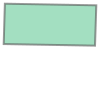

In [30]:
#login into earthaccess
earthaccess.login(strategy='netrc')

#use the AOI_wsg84 converted file to perform unary_union
outline = AOI_wgs84['geometry'].unary_union

# get the min x, min y, max x, max y values of the Area of Interest
outline.bounds

# use the outline.bounds to define the search_area
search_area = shapely.geometry.polygon.orient(outline, sign=1) # a sign of 1 means oriented counter-clockwise

search_area # check that this doesn't actually change the geometry, just the order of the vertices

In [8]:
from earthaccess import DataCollections
import datetime

# Define the time range for the data search. Ideally, you want to source all your data from a similar time period
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2022, 12, 31)

In [32]:
datasets = earthaccess.search_datasets(
    keyword="Sentinel-2", # search for datasets that match the keyword "Sentinel-2"
    polygon=search_area.exterior.coords, # search for datasets that intersect AOI,
    temporal=(start_date, end_date)
)

Datasets found: 5


In [33]:
dataset = datasets[0] # get the first result
dataset.get_umm('EntryTitle') # fill this in with the metadata field that you want

'HLS Sentinel-2 Multi-spectral Instrument Surface Reflectance Daily Global 30m v2.0'

In [34]:
ds_name = dataset.get_umm('ShortName') # return the short name of the dataset

print(f"Dataset short name: {ds_name}")

Dataset short name: HLSS30


In [35]:
results = earthaccess.search_data(
    short_name=ds_name, # search for Sentinel-2 granules
    polygon=search_area.exterior.coords, # search for images that intersect our AOI
    count=10, # only show the first 10 results
    temporal=(start_date, end_date)
)

Granules found: 135


In [36]:
granule = results[1]  # Indexing starts at 0, so 1 is the second item
#from here have a look at the returned image below, if it looks good proceed with the download, 
#otherwise you can change the result shown by changing the indexing in squared brakets
granule

Collection: {'EntryTitle': 'HLS Sentinel-2 Multi-spectral Instrument Surface Reflectance Daily Global 30m v2.0'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Longitude': 17.47719812, 'Latitude': 40.53618553}, {'Longitude': 17.51453839, 'Latitude': 41.5243447}, {'Longitude': 16.19896961, 'Latitude': 41.54559377}, {'Longitude': 16.18114793, 'Latitude': 40.55671174}, {'Longitude': 17.47719812, 'Latitude': 40.53618553}]}}]}}}
Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2022-01-04T09:49:14.490Z', 'EndingDateTime': '2022-01-04T09:49:14.490Z'}}
Size(MB): 185.99097728729248
Data: ['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B12.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.Fmask.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B04.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.SZA.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B05.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B03.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B11.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B07.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B8A.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.VAA.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B06.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B09.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.VZA.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B08.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B01.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B10.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.B02.tif', 'https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T33TXF.2022004T094309.v2.0/HLS.S30.T33TXF.2022004T094309.v2.0.SAA.tif']

In [37]:
# Create the new folder inside Data_files
os.makedirs(ds_name, exist_ok=True)

# Download the second granule into the new directory
downloaded_file = earthaccess.download([granule], ds_name)

 Getting 1 granules, approx download size: 0.18 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

File HLS.S30.T33TXF.2022004T094309.v2.0.B12.tif already downloaded
File HLS.S30.T33TXF.2022004T094309.v2.0.Fmask.tif already downloaded
File HLS.S30.T33TXF.2022004T094309.v2.0.B04.tif already downloaded
File HLS.S30.T33TXF.2022004T094309.v2.0.SZA.tif already downloaded
File HLS.S30.T33TXF.2022004T094309.v2.0.B03.tif already downloaded
File HLS.S30.T33TXF.2022004T094309.v2.0.B05.tif already downloaded
File HLS.S30.T33TXF.2022004T094309.v2.0.B11.tif already downloaded
File HLS.S30.T33TXF.2022004T094309.v2.0.B07.tif already downloaded
File HLS.S30.T33TXF.2022004T094309.v2.0.B8A.tif already downloaded
File HLS.S30.T33TXF.2022004T094309.v2.0.VAA.tif already downloaded
File HLS.S30.T33TXF.2022004T094309.v2.0.B08.tif already downloaded
File HLS.S30.T33TXF.2022004T094309.v2.0.VZA.tif already downloaded
File HLS.S30.T33TXF.2022004T094309.v2.0.B01.tif already downloaded
File HLS.S30.T33TXF.2022004T094309.v2.0.B06.tif already downloaded
File HLS.S30.T33TXF.2022004T094309.v2.0.B09.tif already down

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

C:\Users\M533\AppData\Local\Temp\ipykernel_28896\2108667154.py:11: RuntimeWarning: divide by zero encountered in divide
  ndvi = (nir - red) / (nir + red)
C:\Users\M533\AppData\Local\Temp\ipykernel_28896\2108667154.py:11: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir - red) / (nir + red)


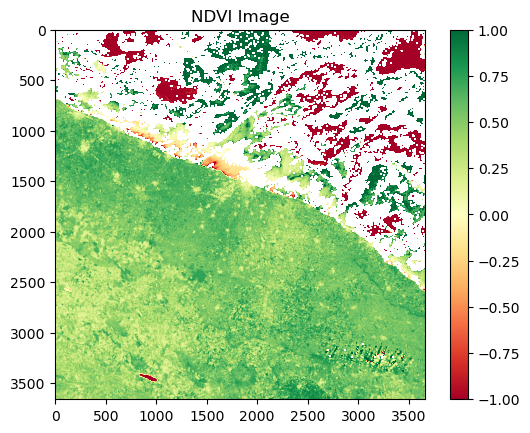

In [39]:
# Now we want to calculate NDVI with the bands we have just downloaded
# Open the red (ending B04) and NIR (ending B08) bands
with rio.open('HLSS30/HLS.S30.T33TXF.2022004T094309.v2.0.B04.tif') as red_src, \
     rio.open('HLSS30/HLS.S30.T33TXF.2022004T094309.v2.0.B08.tif') as nir_src:

    # Read the raster data for the bands
    red = red_src.read(1)
    nir = nir_src.read(1)

    # Calculate NDVI
    ndvi = (nir - red) / (nir + red)

    # Plot NDVI
    plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
    plt.colorbar()
    plt.title('NDVI Image')
    plt.show()

In [18]:
# Define the output path for the NDVI raster file
output_ndvi_path = 'NDVI_output.tif'

# Create a new raster file for the NDVI data
with rio.open(output_ndvi_path, 'w', driver='GTiff', height=ndvi.shape[0], width=ndvi.shape[1],
                       count=1, dtype=ndvi.dtype, crs=red_src.crs, transform=red_src.transform) as dst:
    dst.write(ndvi, 1)

print(f"NDVI data saved to {output_ndvi_path}")

NDVI data saved to NDVI_output.tif


In [40]:
# Now we have an NDVI raster file for the whole area, but we are just interested in our AOI

from rasterio.mask import mask

# Load the NDVI raster
ndvi_path = 'NDVI_output.tif'
with rio.open(ndvi_path) as ndvi_src:
    ndvi_data = ndvi_src.read(1)
    ndvi_transform = ndvi_src.transform

    # Load the search area polygon (replace 'search_area.shp' with your actual shapefile)
    AOI_path = 'Area_of_interest.shp'
    AOI = gpd.read_file(AOI_path)

    # Clip the NDVI data to the search area
    clipped_ndvi_data, clipped_ndvi_transform = mask(ndvi_src, shapes=AOI.geometry, crop=True)

    # Define the output path for the clipped NDVI raster file
    clipped_ndvi_path = 'clipped_ndvi.tif'
    with rio.open(clipped_ndvi_path, 'w', **ndvi_src.meta) as clipped_ndvi_dst:
        clipped_ndvi_dst.write(clipped_ndvi_data)

    print(f"Clipped NDVI saved to {clipped_ndvi_path}")

Clipped NDVI saved to clipped1_ndvi.tif


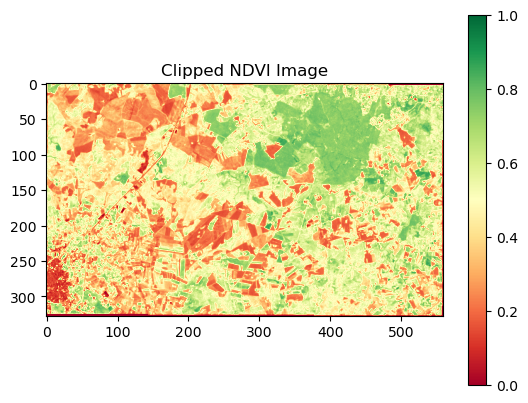

In [41]:
# Plot the clipped NDVI
plt.imshow(clipped_ndvi_data[0], cmap='RdYlGn', vmin=0, vmax=1)
plt.colorbar()
plt.title('Clipped NDVI Image')
plt.show()

In [ ]:
# Part 3 will look at some zonal statistics using the NDVI data we just calculated and another raster file 
# displaying habitat connectivity in the area. 